In [18]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



In [27]:

# Dataset path
dataset_path = r"C:\Users\Shridevi Bharne\Desktop\UCI HAR Dataset"

# Reading files with raw strings or escaped backslashes
activity_labels = pd.read_csv(f"{dataset_path}/activity_labels.txt", header=None, sep=r'\s+', names=["ActivityID", "Activity"])
features = pd.read_csv(f"{dataset_path}/features.txt", header=None, sep=r'\s+', names=["Index", "Feature"])

X = pd.read_csv(f"{dataset_path}/train/X_train.txt", sep=r'\s+', header=None)
y = pd.read_csv(f"{dataset_path}/train/y_train.txt", sep=r'\s+', header=None, names=["ActivityID"])
subjects = pd.read_csv(f"{dataset_path}/train/subject_train.txt", sep=r'\s+', header=None, names=["SubjectID"])

X_test = pd.read_csv(f"{dataset_path}/test/X_test.txt", sep=r'\s+', header=None)
y_test = pd.read_csv(f"{dataset_path}/test/y_test.txt", sep=r'\s+', header=None, names=["ActivityID"])
subject_test = pd.read_csv(f"{dataset_path}/test/subject_test.txt", sep=r'\s+', header=None, names=["SubjectID"])



#Combine training and testing data for preprocessing
#X = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
#y = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)
#subjects = pd.concat([subject_train, subject_test], axis=0).reset_index(drop=True)


In [28]:
# Assign feature names to X
X.columns = features["Feature"]


In [29]:
# Merge activity labels with y
y = y.merge(activity_labels, on="ActivityID", how="left")
y = y["Activity"]  # Extract only the activity names


In [30]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [31]:
# Split the dataset (if not using provided train-test split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Model Accuracy: 98.44%

 Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.96      0.97      0.96       262
          STANDING       0.97      0.96      0.97       276
           WALKING       1.00      0.99      0.99       247
WALKING_DOWNSTAIRS       1.00      1.00      1.00       206
  WALKING_UPSTAIRS       0.99      0.99      0.99       200

          accuracy                           0.98      1471
         macro avg       0.99      0.99      0.99      1471
      weighted avg       0.98      0.98      0.98      1471



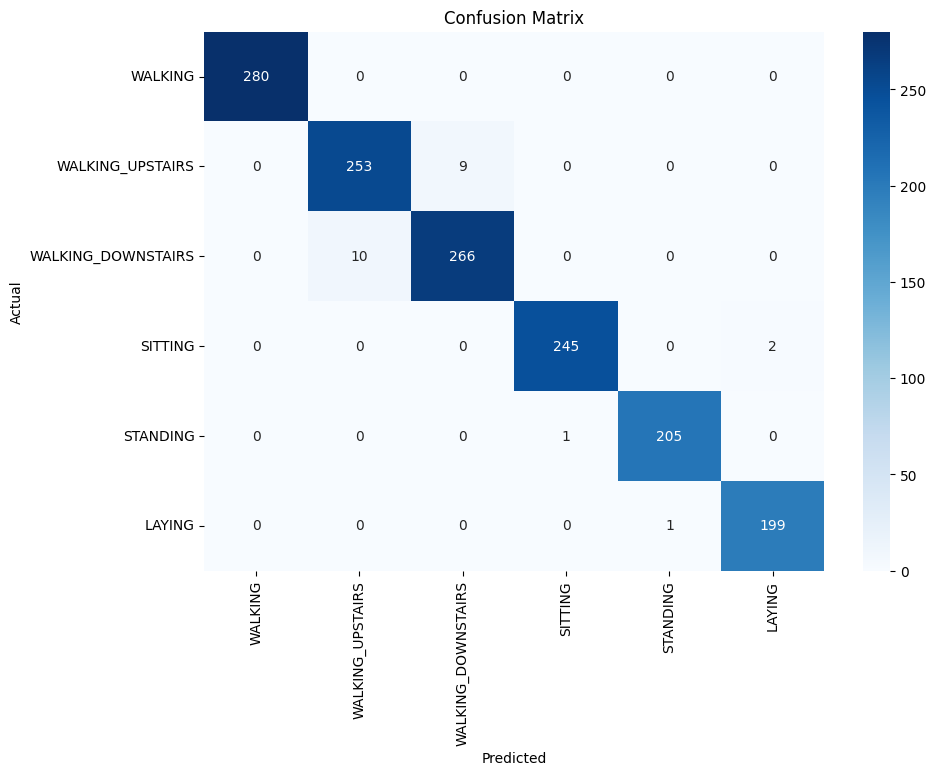

In [33]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=activity_labels["Activity"], yticklabels=activity_labels["Activity"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [40]:
# Convert X_test to DataFrame with feature names
X_test = pd.DataFrame(X_test, columns=features["Feature"])

# Assign feature names to X
X_test.columns = features["Feature"]

# Merge activity labels with y_test while keeping y_test as DataFrame
#y_test = pd.DataFrame(y_test)  # Ensure y_test is a DataFrame

# Convert y_test to DataFrame and ensure it contains the ActivityID column
y_test = pd.DataFrame(y_test, columns=["ActivityID"])

# Merge activity labels with y
y_test = y_test.merge(activity_labels, on="ActivityID", how="left")
y_test = y_test["Activity"]  # Extract only the activity names

# Preprocess test data
X_test_scaled = scaler.transform(X_test)

# Predict activities
predicted_activities = model.predict(X_test_scaled)

# Evaluate model
#print("Accuracy:", accuracy_score(y_test, predicted_activities))
#print("\nConfusion Matrix:\n", confusion_matrix(y_test, predicted_activities))
#print("\nClassification Report:\n", classification_report(y_test, predicted_activities, target_names=activity_labels))

# Analyze predictions by subject
#test_results = pd.DataFrame({
 #   "Subject": subject_test.iloc[:, 0],
  #  "True Activity": y_test.iloc[:, 0],
   # "Predicted Activity": predicted_activities
#})
#print(test_results.head())
# Check if y_test needs encoding and encode if necessary
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# If model's predictions are already numeric, use them directly
# Otherwise, encode predicted activities too
predicted_activities_encoded = label_encoder.transform(predicted_activities)

# Now compute accuracy and other metrics
print("Accuracy:", accuracy_score(y_test_encoded, predicted_activities_encoded))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_encoded, predicted_activities_encoded))
print("\nClassification Report:\n", classification_report(y_test_encoded, predicted_activities_encoded, target_names=label_encoder.classes_))




ValueError: y contains previously unseen labels: 'WALKING_DOWNSTAIRS'

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ensure y_test is in the correct format (Series or DataFrame)
print("y_test type:", type(y_test))
print("y_test sample:", y_test.head())  # Show first few rows of y_test

# Fit LabelEncoder on both y_test and predicted_activities to ensure all labels are accounted for
label_encoder = LabelEncoder()

# Combine y_test and predicted_activities to ensure all labels are known
all_labels = pd.concat([y_test, pd.Series(predicted_activities)]).unique()  # Concatenate and get unique labels

# Fit the encoder on all possible labels
label_encoder.fit(all_labels)

# Encode y_test using the fitted encoder
if not pd.api.types.is_numeric_dtype(y_test):  # If y_test contains strings
    y_test_encoded = label_encoder.transform(y_test)
    print("Encoded y_test sample:", y_test_encoded[:5])  # Show first few encoded labels
else:
    y_test_encoded = y_test
    print("y_test is already numeric.")

# Check predicted_activities type and encode if necessary
print("predicted_activities type:", type(predicted_activities))
print("predicted_activities sample:", predicted_activities[:5])  # Show first few predictions

# Encode predicted_activities using the same fitted encoder
if not pd.api.types.is_numeric_dtype(predicted_activities):  # If not already numeric
    predicted_activities_encoded = label_encoder.transform(predicted_activities)
    print("Encoded predicted_activities sample:", predicted_activities_encoded[:5])  # Show first few encoded predictions
else:
    predicted_activities_encoded = predicted_activities
    print("predicted_activities are already numeric.")

# Now compute accuracy and other metrics
accuracy = accuracy_score(y_test_encoded, predicted_activities_encoded)
conf_matrix = confusion_matrix(y_test_encoded, predicted_activities_encoded)
class_report = classification_report(y_test_encoded, predicted_activities_encoded, target_names=label_encoder.classes_)

# Display results
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


y_test type: <class 'pandas.core.series.Series'>
y_test sample: Series([], Name: Activity, dtype: object)
Encoded y_test sample: []
predicted_activities type: <class 'numpy.ndarray'>
predicted_activities sample: ['WALKING_DOWNSTAIRS' 'WALKING_DOWNSTAIRS' 'WALKING' 'SITTING'
 'WALKING_DOWNSTAIRS']
Encoded predicted_activities sample: [4 4 3 1 4]


ValueError: Found input variables with inconsistent numbers of samples: [0, 1471]